# Breast Cancer Analysis

In [102]:
# Required Python Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [103]:
# Read Data train
df = pd.read_csv('breast-cancer-wisconsin.csv')

In [104]:
df.head()

,CodeNumber,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,CancerType
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
CodeNumber                  698 non-null int64
ClumpThickness              698 non-null int64
UniformityCellSize          698 non-null int64
UniformityCellShape         698 non-null int64
MarginalAdhesion            698 non-null int64
SingleEpithelialCellSize    698 non-null int64
BareNuclei                  698 non-null object
BlandChromatin              698 non-null int64
NormalNucleoli              698 non-null int64
Mitoses                     698 non-null int64
CancerType                  698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [109]:
# Replace ? with nan
df.replace({"?":np.nan}, inplace=True)
print("Percentage of Empty in Each Attributes")
df.isnull().sum(axis = 0)/len(df)

Percentage of Empty in Each Attributes


CodeNumber                  0.0
ClumpThickness              0.0
UniformityCellSize          0.0
UniformityCellShape         0.0
MarginalAdhesion            0.0
SingleEpithelialCellSize    0.0
BareNuclei                  0.0
BlandChromatin              0.0
NormalNucleoli              0.0
Mitoses                     0.0
CancerType                  0.0
dtype: float64

In [110]:
df.drop(df[pd.isnull(df['BareNuclei'])].index, inplace=True)

In [111]:
df.describe()

,CodeNumber,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BlandChromatin,NormalNucleoli,Mitoses,CancerType
count,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,1.076833e+06,4.441349,3.153959,3.218475,2.832845,3.236070,3.445748,2.872434,1.604106,2.700880
std,6.210926e+05,2.822751,3.066285,2.989568,2.865805,2.224214,2.451435,3.054065,1.733792,0.954916
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.774540e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171820e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238741e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


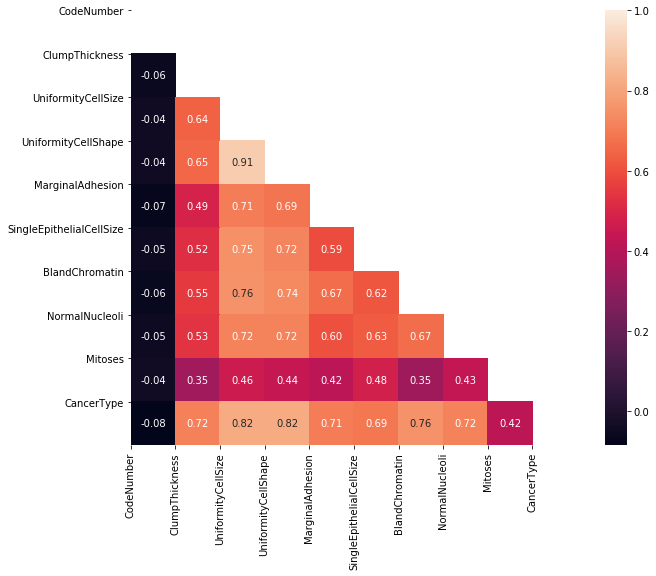

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

## Learning Phase

In [113]:
y = df['CancerType']
X = df.drop(['CodeNumber', 'CancerType'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)
print("Train_x Shape :: ", X_train.shape[0])
print("Train_y Shape :: ", y_train.shape[0])
print("Test_x Shape :: ", X_test.shape[0])
print("Test_y Shape :: ", y_test.shape[0])

Train_x Shape ::  477
Train_y Shape ::  477
Test_x Shape ::  205
Test_y Shape ::  205


### 1. Decision Tree

In [114]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print('Accuracy : ' + str(accuracy_score(y_test, dt_pred)))
print(classification_report(y_test,dt_pred))

for i in range(0, 5):
        print("Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test)[i], dt_pred[i]))

Accuracy : 0.9414634146341463
              precision    recall  f1-score   support

           2       0.95      0.96      0.95       128
           4       0.93      0.91      0.92        77

   micro avg       0.94      0.94      0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 4 and Predicted outcome :: 4


### 2. Random Forest

In [115]:
dt = RandomForestClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print('Accuracy : ' + str(accuracy_score(y_test, dt_pred)))
print(classification_report(y_test,dt_pred))

for i in range(0, 5):
        print("Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test)[i], dt_pred[i]))

Accuracy : 0.9512195121951219
              precision    recall  f1-score   support

           2       0.95      0.97      0.96       128
           4       0.95      0.92      0.93        77

   micro avg       0.95      0.95      0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 2 and Predicted outcome :: 2
Actual outcome :: 4 and Predicted outcome :: 4


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
